In [1]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("../scripts")
%load_ext autoreload
%autoreload 2
from local_plot import *



Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Read poses from topic /SwarmNode1/pose
Trajectory total length  33.7049692826846
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Read poses from topic /SwarmNode2/pose
Trajectory total length  42.52962406778749
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Yaw Offset,  3.621983137371798 Fused Offset [0.84851473 0.35054472 0.12608865]
RMSE Fused Online 1 is 0.057,0.054,0.056
RMSE Fused Offline Path 1 is 0.081,0.052,0.046
RMSE VO 1 is 0.052,0.095,0.060
RMSE Fused Online 2 is 0.067,0.073,0.054
RMSE Fused Offline Path 2 is 0.059,0.073,0.038
RMSE VO 2 is 0.075,0.064,0.036
RMSE 1->2 0.074,0.072,0.041


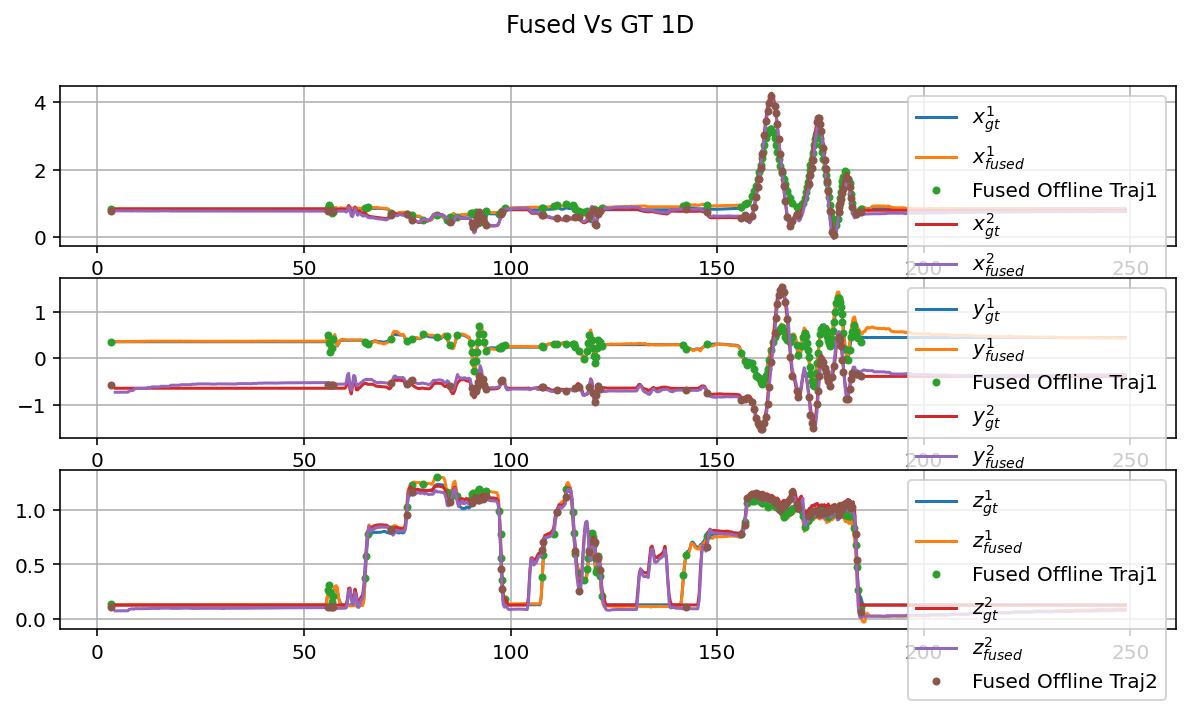

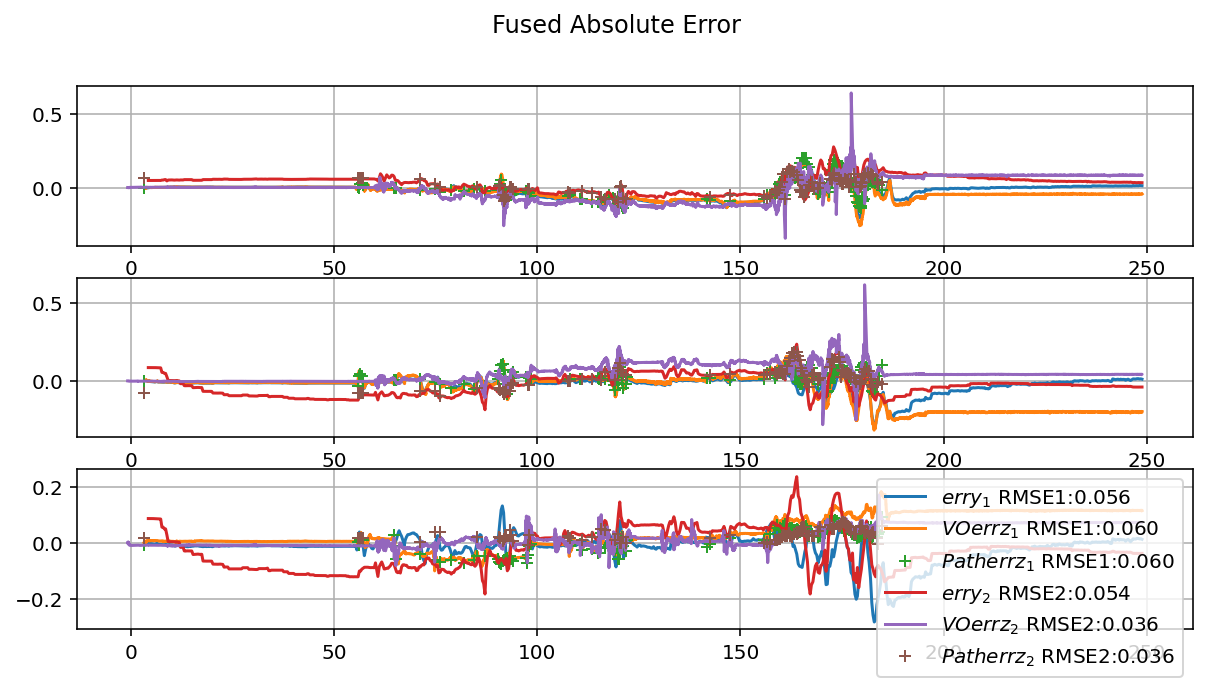

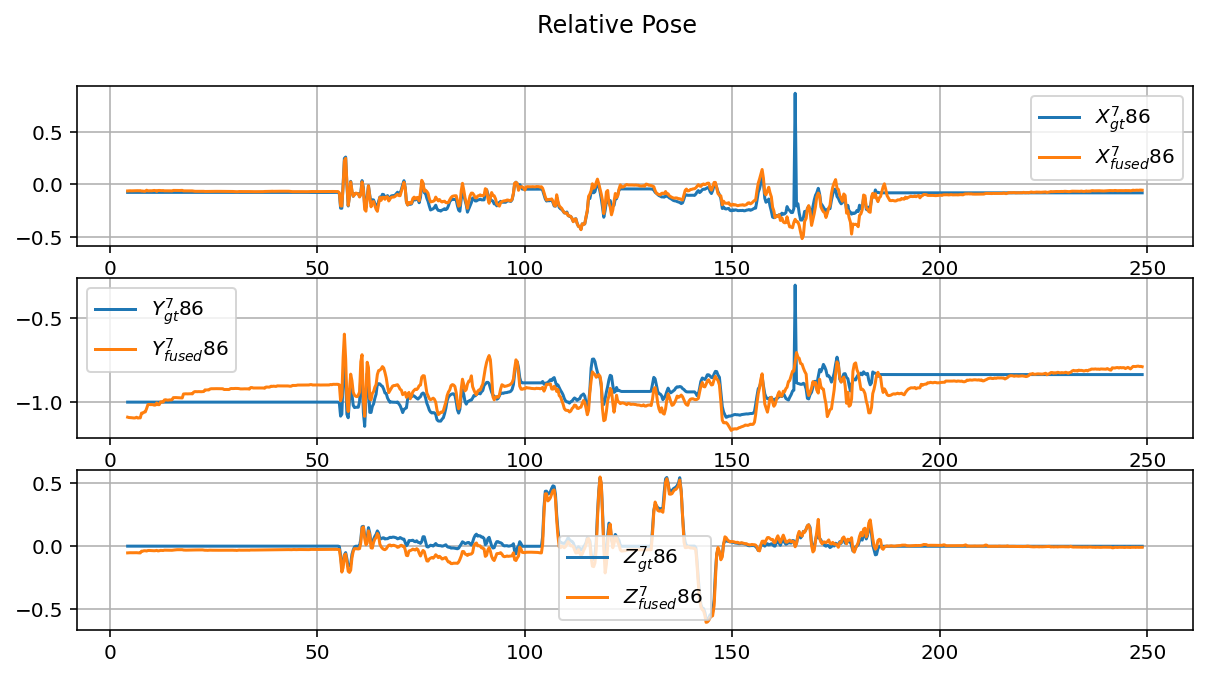

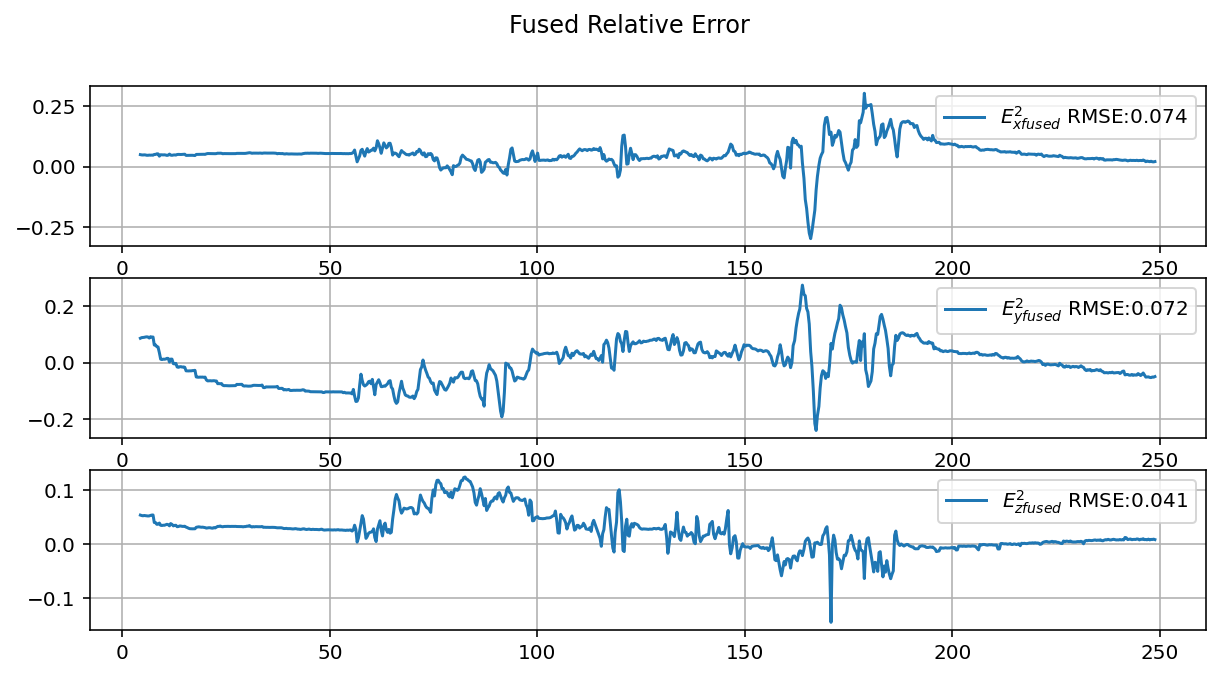

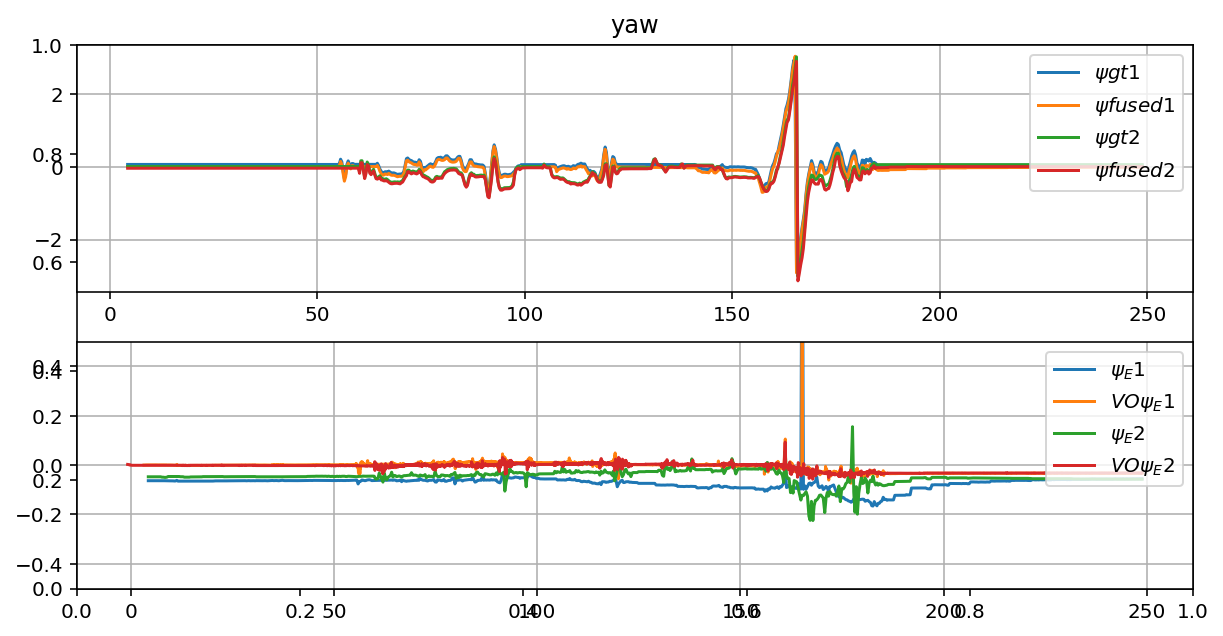

In [5]:
nodes = [1, 2]
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-19-39-05.bag", nodes, False)
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-20-33-29.bag", nodes, False)
poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_pc.bag", nodes, True)

plt.close('all')

#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes, 1)
plt.show()

In [ ]:
plot_loops_error(poses, loops, nodes)

In [ ]:
plt.close('all')
plot_detection_error(poses, poses_vo, detections, nodes)
